<a href="https://colab.research.google.com/github/rashmimurali/Customer-Segmentation/blob/main/CustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
#drive.mount('/content/drive')

# Path to your dataset
csv_path = "/content/drive/MyDrive/CustomerSegmentation/customer_transactions.csv"

# Load data
df = pd.read_csv(csv_path, parse_dates=["Date"])

# Quick checks
print(df.shape)      # (50000, 8)
print(df.head(3))
print(df.dtypes)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(50000, 8)
   CustomerID TransactionID       Date ProductCategory  Quantity   Price  \
0        2824       T000001 2024-09-06     Electronics         4  475.60   
1        4657       T000002 2025-01-29        Clothing         3  390.95   
2        7912       T000003 2024-11-14     Electronics         5   82.23   

  PaymentMethod Channel  
0           UPI  Online  
1   Credit Card  Online  
2   Credit Card  Online  
CustomerID                  int64
TransactionID              object
Date               datetime64[ns]
ProductCategory            object
Quantity                    int64
Price                     float64
PaymentMethod              object
Channel                    object
dtype: object


In [2]:
# Add a Revenue column
df["Revenue"] = df["Quantity"] * df["Price"]

# Total revenue
print("Total Revenue:", df["Revenue"].sum())

# Revenue by category
print(df.groupby("ProductCategory")["Revenue"].sum().sort_values(ascending=False))

# Revenue by channel
print(df.groupby("Channel")["Revenue"].sum())

Total Revenue: 37862798.41
ProductCategory
Clothing       6417164.90
Electronics    6313075.08
Toys           6294802.17
Groceries      6294419.46
Furniture      6279470.31
Books          6263866.49
Name: Revenue, dtype: float64
Channel
In-store    18917658.55
Online      18945139.86
Name: Revenue, dtype: float64


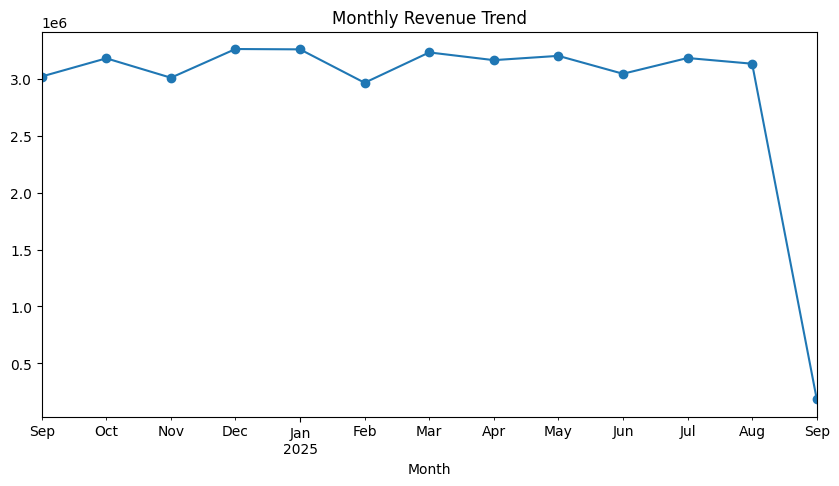

In [7]:
import matplotlib.pyplot as plt

# Group by month
df["Month"] = df["Date"].dt.to_period("M")
monthly_revenue = df.groupby("Month")["Revenue"].sum()

# Plot
monthly_revenue.plot(kind="line", marker="o", figsize=(10,5), title="Monthly Revenue Trend")
plt.show()

In [4]:
# Transactions per customer
customer_spend = df.groupby("CustomerID")["Revenue"].sum()

print("Avg spend per customer:", customer_spend.mean())
print("Top 5 customers by revenue:\n", customer_spend.sort_values(ascending=False).head())

Avg spend per customer: 4224.8157118946665
Top 5 customers by revenue:
 CustomerID
5891    16161.14
2843    14477.52
6752    14152.46
4404    13937.34
3234    13745.69
Name: Revenue, dtype: float64


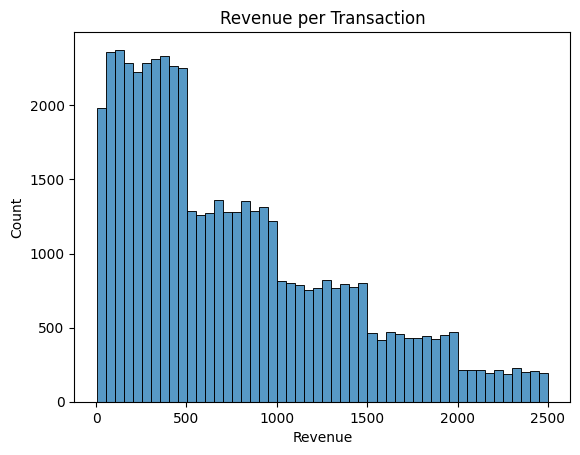

In [11]:
import seaborn as sns

# Revenue distribution
sns.histplot(df["Revenue"], bins=50)
plt.title("Revenue per Transaction")
plt.show()


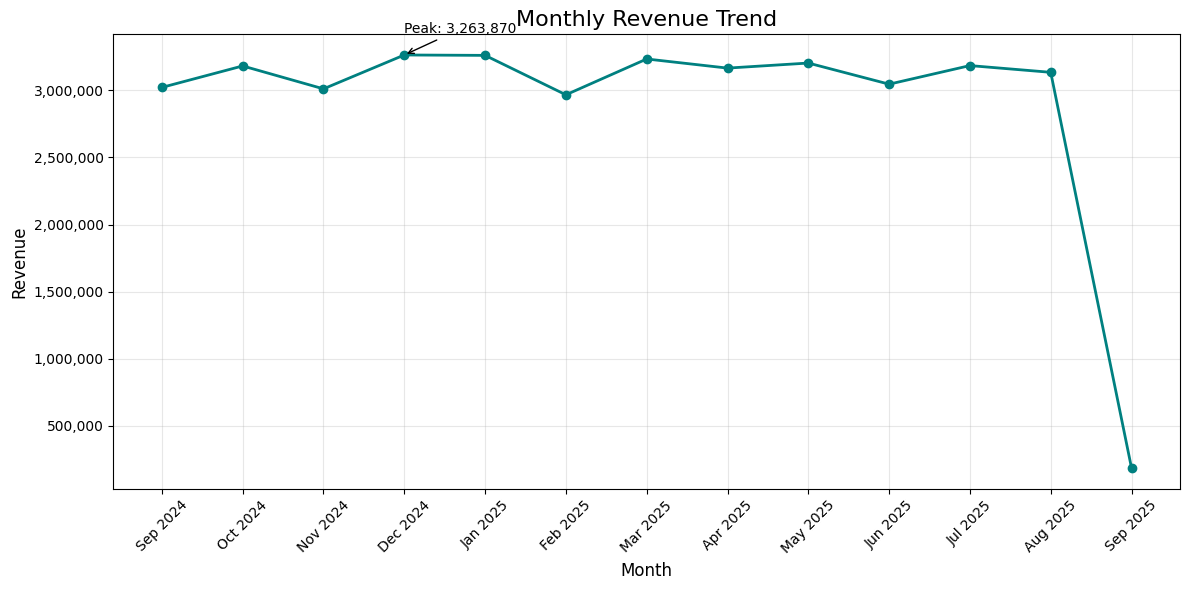

In [18]:
df["Revenue"] = df["Quantity"] * df["Price"]

# ---------------------------
# Step 3: Group by Month
# ---------------------------
df["Month"] = df["Date"].dt.to_period("M")            # Period type for grouping
monthly_revenue = df.groupby("Month")["Revenue"].sum().sort_index()  # Sort months

# Convert period index to string for x-axis labels
monthly_labels = monthly_revenue.index.strftime('%b %Y')  # e.g., Jan 2024, Feb 2024

# ---------------------------
# Step 4: Plot
# ---------------------------
plt.figure(figsize=(12,6))
plt.plot(monthly_labels, monthly_revenue.values, marker='o', linewidth=2, color='teal')

# Annotate peak revenue month
peak_month = monthly_labels[monthly_revenue.idxmax().month - 1]  # adjust for index
peak_value = monthly_revenue.max()
plt.annotate(f'Peak: {peak_value:,.0f}',
             xy=(monthly_revenue.idxmax().strftime('%b %Y'), peak_value),
             xytext=(monthly_revenue.idxmax().strftime('%b %Y'), peak_value*1.05),
             arrowprops=dict(facecolor='red', arrowstyle='->'))

# Labels, title, and formatting
plt.title("Monthly Revenue Trend", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))  # format y-axis with commas

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [9]:
df.groupby("ProductCategory")["Revenue"].sum().sort_values(ascending=False)

,Revenue
ProductCategory,
Clothing,6417164.90
Electronics,6313075.08
Toys,6294802.17
Groceries,6294419.46
Furniture,6279470.31
Books,6263866.49


In [10]:
df.groupby("Channel")["Revenue"].sum()

,Revenue
Channel,
In-store,18917658.55
Online,18945139.86


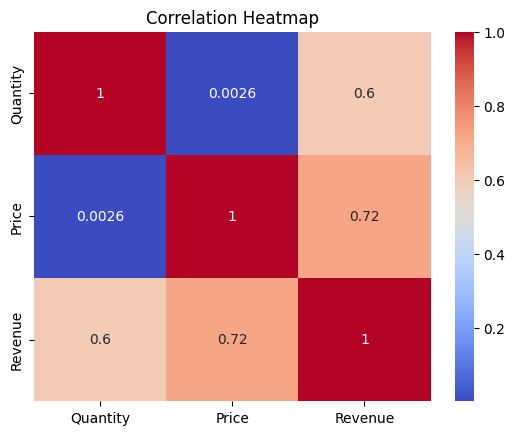

In [12]:
# Correlation heatmap
corr = df[["Quantity", "Price", "Revenue"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()